In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.shape

(768, 10)

In [ ]:
# checck to see if there is any missing values
null_v = df.isnull().sum()
print(null_v)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [ ]:
#dealing with categorical value;encoding the levels of categorical features into numeric values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.X6=le.fit_transform(df.X6)


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,1.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,1.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,2.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,3.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
#Definig Y
y = df.Y2
y.head()
y.shape

(768,)

In [ ]:
#Defining x
x = df.iloc[:,0:-2]
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,0,0.0,0
1,0.98,514.5,294.0,110.25,7.0,1,0.0,0
2,0.98,514.5,294.0,110.25,7.0,2,0.0,0
3,0.98,514.5,294.0,110.25,7.0,3,0.0,0
4,0.90,563.5,318.5,122.50,7.0,0,0.0,0


<function matplotlib.pyplot.show>

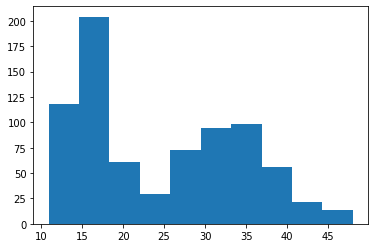

In [ ]:
#Show the distribution of outcomes
plt.hist(y)
plt.show

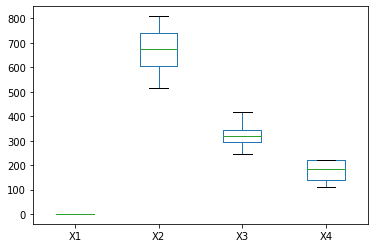

In [ ]:
df_sub = df.iloc[:,:4]
df_sub.plot.box()

<function matplotlib.pyplot.show>

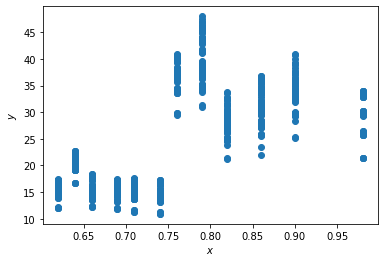

In [ ]:
plt.scatter(x1,y)
#plt.scatter(x2,y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

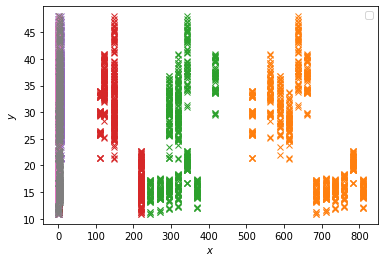

In [ ]:
plt.plot(x,y,'x')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test. shape

((614, 8), (614,), (154, 8), (154,))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([-6.48811200e+01, -6.36253733e+10,  6.36253733e+10,  1.27250747e+11,
        4.31770885e+00,  1.43550738e-01,  1.50685947e+01,  2.37136101e-02])

In [ ]:
reg.intercept_

87.53358493170352

In [ ]:
reg.score(X_test,Y_test)

0.886253964672158

In [ ]:
y_predict = reg.predict(X_test)

In [ ]:
mean_squared_error(Y_test, y_predict)

10.698450148100239

In [ ]:
y_predict

array([19.2041016 , 12.26429782, 32.24835306, 29.77121086, 32.0772491 ,
       30.21123578, 29.98422425, 35.55897448, 32.04601985, 31.08582329,
       11.91801499, 36.88876859, 14.87450115, 36.76893146, 36.84007229,
       29.66589352, 13.49601529, 30.18752217, 18.08275248, 15.44548941,
       15.87740615, 32.10096271, 13.06536308, 34.36509152, 10.85356187,
       17.70577861, 15.82246328, 16.56891558, 13.44858807, 34.43623235,
       15.55907541, 17.08736313, 36.64909434, 17.06364952, 29.86438712,
       37.61536763, 16.52148836, 37.66279485, 20.27190085, 13.37603466,
       14.68352319, 34.652193  , 18.3773696 , 33.7530511 , 27.77707813,
       27.60409792, 13.54344251, 16.16450762, 30.11511227, 34.33002266,
       32.24451345, 15.63148532, 35.80944425, 19.10797808, 37.63908124,
       12.38413495, 26.02609762, 33.70562388, 34.84317096, 18.3049597 ,
       19.34765234, 15.30193867, 32.26822706, 12.33543865, 15.4217758 ,
       14.26119916, 34.79574374, 13.52099343, 29.68960713, 34.81

In [ ]:
dw = np.array(y_predict).tolist()

In [ ]:
dw

[19.204101598554985,
 12.26429782067251,
 32.248353057585774,
 29.771210856573887,
 32.07724910295917,
 30.211235783107696,
 29.984224248100944,
 35.55897447533323,
 32.04601984599692,
 31.08582329009485,
 11.918014994660624,
 36.88876859072013,
 14.874501151077567,
 36.76893146309419,
 36.84007229349925,
 29.665893515616773,
 13.49601529356849,
 30.187522172972677,
 18.082752481457717,
 15.445489410665758,
 15.877406145800776,
 32.10096271309419,
 13.065363080285607,
 34.36509152257902,
 10.853561869660624,
 17.705778613419966,
 15.822463278703509,
 16.56891558106406,
 13.448588073298453,
 34.43623235298408,
 15.559075413316606,
 17.087363133561738,
 36.64909433546825,
 17.06364952342672,
 29.864387120475,
 37.61536763271404,
 16.521488360794024,
 37.66279485298408,
 20.27190085380687,
 13.37603465637774,
 14.683523193046568,
 34.652192998100944,
 18.37736960380687,
 33.75305109599692,
 27.777078131051965,
 27.604097917720793,
 13.543442513838528,
 16.1645076213227,
 30.11511226561677

In [ ]:
Y_test

661    17.63
122    13.57
113    34.62
14     21.16
529    33.34
       ...  
476    15.41
482    30.00
230    15.00
527    14.75
380    15.32
Name: Y2, Length: 154, dtype: float64

In [ ]:
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train, X2)
est2 = est.fitprint(est2.summary())

AttributeError: ignored

<function matplotlib.pyplot.show>

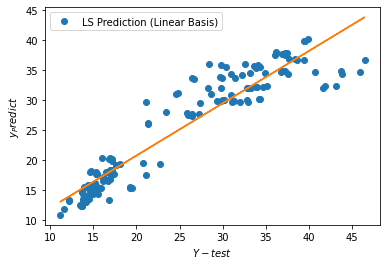

In [ ]:
#plt.plot(x, y, 'x', markeredgewidth=2, label='Observations')
#plt.style.use("ggplot")
plt.plot(Y_test, dw,'o',label='LS Prediction (Linear Basis)')
plt.xlabel("$Y-test$")
plt.ylabel("$y_Predict$")
plt.legend()
#Adding the slope line
m, b = np.polyfit(Y_test, dw, 1)
plt.plot(Y_test, m*Y_test + b)
plt.show

In [ ]:
y_predict[:20]

array([19.2041016 , 12.26429782, 32.24835306, 29.77121086, 32.0772491 ,
       30.21123578, 29.98422425, 35.55897448, 32.04601985, 31.08582329,
       11.91801499, 36.88876859, 14.87450115, 36.76893146, 36.84007229,
       29.66589352, 13.49601529, 30.18752217, 18.08275248, 15.44548941])

In [ ]:
df_sub

,X1,X2,X3,X4
0,0.98,514.5,294.0,110.25
1,0.98,514.5,294.0,110.25
2,0.98,514.5,294.0,110.25
3,0.98,514.5,294.0,110.25
4,0.90,563.5,318.5,122.50
...,...,...,...,...
763,0.64,784.0,343.0,220.50
764,0.62,808.5,367.5,220.50
765,0.62,808.5,367.5,220.50
766,0.62,808.5,367.5,220.50
